# Edge Detection

1. If we directly apply the gradient kernel, it amplifies the noise.
2. Therefore the we need to smooth the image to reduce the noise and then we can take the gradient.
3. If the image is $I(x,y)$, and Gaussian $G(u,v)$ be the circularly symmetric smoothing filter.

## Steps
1. Convolve the image with the Gaussian kernel. $I(x,y) * G(u,v)$ to get a smoothed image.
2. Then apply the gradient operator.

## or else
1. Convolve the Gaussian with Gradient.
2. Convolve the resultant kernel with the image.

In [2]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(512, 512)


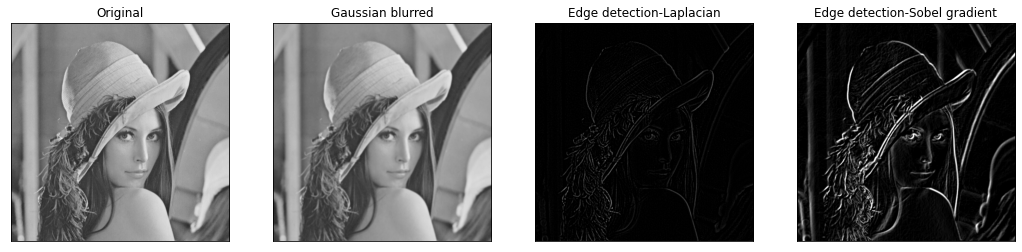

In [27]:
orgimg = cv.imread('..\PracticeCV\Lenna.png', cv.IMREAD_GRAYSCALE)
print(orgimg.shape)

#Generating the Gaussian Kernel
kernel_dim = 5 # dimension of the kernel
sigma = 1 # standard deviation
kernel = cv.getGaussianKernel(kernel_dim, sigma)
smoothed_img = cv.sepFilter2D(orgimg, -1, kernel, kernel) #Gaussian smoothed

#Generating the laplacian kernels
kernel2 = np.array([(-1,-1,-1),(-1,8,-1),(-1,-1,-1)]) # Able to capture diagonal transitions too therfore-more filtering effect
laplacin_edges = cv.filter2D(smoothed_img, -1, kernel2) 

# Declaring sobel vertical and horizontal kernels
sobel_vertical_kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float') #central differnce in vertical---> sobel vertical kernel
sobel_horizontal_kernel = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype='float') #central differnce in horizontal---> sobel horizontal kernel

# Calculating gradient of the original image using soble operators
img_hor_edges = cv.filter2D(smoothed_img,-1,sobel_vertical_kernel) # Horizontal edges are detcted by verical kernel--g_x
img_ver_edges = cv.filter2D(smoothed_img,-1,sobel_horizontal_kernel) # Vertical edges are detected by horizontal kernel--g_y
# -1 is the desired depth of the img

# |grad| = sqrt(g_x**2 + g_y**2) nearly equal to |g_x|+|g_y|
gradient_image = cv.addWeighted(img_hor_edges , 1.0,img_ver_edges , 1, 0) #Opencv addition is used because numpy addition saturates.


# Plotting
fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(orgimg, cmap='gray', vmin = 0, vmax = 255)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(smoothed_img, cmap='gray', vmin = 0, vmax = 255)
axes[1].set_title('Gaussian blurred')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(laplacin_edges, cmap='gray', vmin = 0, vmax = 255)
axes[2].set_title('Edge detection-Laplacian')
axes[2].set_xticks([]), axes[1].set_yticks([])
axes[3].imshow(gradient_image, cmap='gray', vmin = 0, vmax = 255)
axes[3].set_title('Edge detection-Sobel gradient')
axes[3].set_xticks([]), axes[1].set_yticks([])
plt.show()